In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import korean_language

#### AI 잘하는 영역 : 기억, 처리, 예측(학습)
#### 사람이 잘하는 영역 : 감성적 능력, 소통, 즉흥성, 일반화
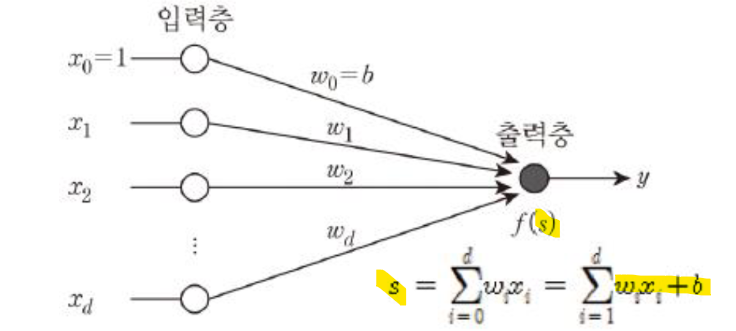
#### tensorflow 1.0 --> 2.0 > keras
---
### tensorflow을 이용한 선형예측

In [3]:
import tensorflow as tf

In [5]:
x = np.array([1.0,2.0,3.0,4.0,5.0])
y = np.array([1.0,3.0,5.0,7.0,9.0])

In [8]:
w = tf.Variable(0.3)
b = tf.Variable(-0.3)

### 선형회귀 모델 생성 

In [9]:
def linear_regression(x):
    linear_model = w*x +b
    return linear_model

### 손실함수 생성 

In [10]:
def mean_square(pred, real):
    err = tf.reduce_mean(tf.square(pred - real))
    return err

### 경사하강법 생성 : 학습한 결과에 대해 손실함수를 적용해 오차를 계산하고 파라미터(w,b)를 갱신

In [11]:
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)

def train_step(x,y):
    with tf.GradientTape() as tape:   # 텐서프로로우에서 제공하는 경사강법 함수 GradientTape를 alias 지정
        pred = linear_regression(x)
        loss = mean_square(pred, y)
        
    gradient = tape.gradient(loss, [w,b])  # 경사하강법 계산
    optimizer.apply_gradients(zip(gradient,[w,b])) # 경사하강법으로 나온 결과로 파라미터 갱신

In [15]:
epochs = 1000

for epoch in range(1,epochs):
    train_step(x, y)
    pred = linear_regression(x)
    loss = mean_square(pred, y)
    if epoch % 10 ==0:
        print(f"epoch : {epoch},  w : {w.numpy()},  b : {b.numpy()}, loss : {loss.numpy()}")

epoch : 10,  w : 1.999664545059204,  b : -0.9987887740135193, loss : 2.670677190508286e-07
epoch : 20,  w : 1.9996755123138428,  b : -0.9988291263580322, loss : 2.494572584055277e-07
epoch : 30,  w : 1.999686360359192,  b : -0.9988679885864258, loss : 2.3320271225202305e-07
epoch : 40,  w : 1.999696969985962,  b : -0.9989056587219238, loss : 2.1811055717080308e-07
epoch : 50,  w : 1.9997069835662842,  b : -0.9989420771598816, loss : 2.036807984495681e-07
epoch : 60,  w : 1.9997165203094482,  b : -0.9989772439002991, loss : 1.9045639021442184e-07
epoch : 70,  w : 1.9997260570526123,  b : -0.999011218547821, loss : 1.7785993122743093e-07
epoch : 80,  w : 1.9997352361679077,  b : -0.9990441799163818, loss : 1.6627589616291516e-07
epoch : 90,  w : 1.9997440576553345,  b : -0.9990759491920471, loss : 1.5543001552487112e-07
epoch : 100,  w : 1.999752402305603,  b : -0.9991066455841064, loss : 1.4524512437219528e-07
epoch : 110,  w : 1.9997607469558716,  b : -0.9991363286972046, loss : 1.3570

### 성능 테스트 

In [16]:
x,y

(array([1., 2., 3., 4., 5.]), array([1., 3., 5., 7., 9.]))

In [17]:
pred_y = linear_regression(x)
print(f"prediction : {pred_y}")

prediction : [1.000031 3.000019 5.000007 6.999995 8.999984]
